<a href="https://colab.research.google.com/github/Us9r/BikeSharingDashboard/blob/main/Copy_of_all_normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_indomaret = pd.read_excel("https://raw.githubusercontent.com/Us9r/vault/main/indomaretv2/indomaretv2.xlsx")
df_populasi = pd.read_excel("https://raw.githubusercontent.com/Us9r/vault/main/indomaretv2/padatan_penduduk.xlsx")
df_alfamart = pd.read_excel("https://raw.githubusercontent.com/Us9r/vault/main/indomaretv2/alfamartv2.xlsx")

In [3]:
df_indomaret['neighborhood'].head() #review kolom neighborhood

,neighborhood
0,"Duku, Ilir Timur II"
1,"3 Ilir, Ilir Timur II"
2,"Lawang Kidul, Ilir Timur II"
3,"2 Ilir, Ilir Timur II"
4,"Sei Selayur, Kalidoni"


In [4]:
df_populasi.head() #review kolom kecamatan

,Kecamatan,Male,Female,Jumlah Penduduk,Luas,Jiwa/km²
0,Ilir Barat II,35121,34750,69871,4.18,16715
1,Gandus,42484,41398,83882,49.64,1689
2,Seberang Ulu I,48601,47457,96058,6.08,15799
3,Kertapati,50617,48959,99576,41.09,2423
4,Jakabaring,35744,35126,70870,11.72,6046


In [5]:
df_indomaret['neighborhood'] = df_indomaret['neighborhood'].str.split(',').str[-1].str.strip() #hapus kelurahannya, disni akan mencocokkan berdasarkan kecamatan

In [6]:
df_populasi = df_populasi.drop(columns=["Male","Female","Jumlah Penduduk","Luas"])

In [7]:
df_indomaret['neighborhood'].head() #review hasil strip/trim

,neighborhood
0,Ilir Timur II
1,Ilir Timur II
2,Ilir Timur II
3,Ilir Timur II
4,Kalidoni


In [8]:
# Merge the two dataframes based on matching 'Kecamatan' and 'neighborhood'
df_merged = pd.merge(df_indomaret, df_populasi, left_on='neighborhood', right_on='Kecamatan', how='left')

# Assign the 'Jiwa/km' values to the corresponding rows in df_indomaret
df_indomaret['Jiwa/km²'] = df_merged['Jiwa/km²']

df_indomaret.head()

,location/lat,location/lng,neighborhood,rank,reviewsCount,street,title,totalScore,url,Jiwa/km²
0,-2.971803,104.769765,Ilir Timur II,1,29,"2QH9+7WC, Jl. Dr. M. Isa",Indomaret | Duku,3.7,https://www.google.com/maps/search/?api=1&quer...,10071.0
1,-2.971179,104.783743,Ilir Timur II,2,16,Jl. R. E. Martadinata No.18D,Indomaret R E Martadinata,4.3,https://www.google.com/maps/search/?api=1&quer...,10071.0
2,-2.979114,104.776126,Ilir Timur II,3,29,Jl. Slamet Riady No.1557,Indomaret boom baru,3.8,https://www.google.com/maps/search/?api=1&quer...,10071.0
3,-2.957534,104.783015,Ilir Timur II,4,108,Jl. Urip Sumoharjo No.30,Indomaret Ajen,4.4,https://www.google.com/maps/search/?api=1&quer...,10071.0
4,-2.967813,104.802646,Kalidoni,5,21,Jl. May Zen No.3,Indomaret,4.3,https://www.google.com/maps/search/?api=1&quer...,4034.0


In [9]:
columns_to_keep = ['title', 'totalScore', 'reviewsCount', 'neighborhood','location/lng','location/lat','Jiwa/km²']
df_indomaret = df_indomaret[columns_to_keep]
df_indomaret.head() #review sekali lagi untuk lihat hasil

,title,totalScore,reviewsCount,neighborhood,location/lng,location/lat,Jiwa/km²
0,Indomaret | Duku,3.7,29,Ilir Timur II,104.769765,-2.971803,10071.0
1,Indomaret R E Martadinata,4.3,16,Ilir Timur II,104.783743,-2.971179,10071.0
2,Indomaret boom baru,3.8,29,Ilir Timur II,104.776126,-2.979114,10071.0
3,Indomaret Ajen,4.4,108,Ilir Timur II,104.783015,-2.957534,10071.0
4,Indomaret,4.3,21,Kalidoni,104.802646,-2.967813,4034.0


In [10]:
df_indomaret.describe() #melihat distribusi dataset

,totalScore,reviewsCount,location/lng,location/lat,Jiwa/km²
count,329.000000,371.000000,371.000000,371.000000,363.000000
mean,4.107903,60.008086,104.749890,-2.962011,7664.336088
std,0.731019,105.680638,0.034248,0.033639,4406.761273
min,1.000000,0.000000,104.667878,-3.068441,1689.000000
25%,3.900000,3.000000,104.725621,-2.987285,4034.000000
50%,4.400000,15.000000,104.748715,-2.963339,5295.000000
75%,4.500000,70.000000,104.771090,-2.936300,12621.000000
max,5.000000,968.000000,104.846538,-2.876028,16715.000000


In [11]:
# Drop rows with missing values
df_indomaret = df_indomaret.dropna()

In [12]:
df_indomaret.describe()

,totalScore,reviewsCount,location/lng,location/lat,Jiwa/km²
count,322.000000,322.000000,322.000000,322.000000,322.000000
mean,4.129814,68.928571,104.750978,-2.963521,7763.748447
std,0.705726,110.745890,0.033618,0.034160,4413.006312
min,1.000000,1.000000,104.681345,-3.068441,1689.000000
25%,3.900000,6.000000,104.726008,-2.989431,4034.000000
50%,4.400000,20.000000,104.749688,-2.966218,5295.000000
75%,4.500000,91.750000,104.775362,-2.937618,12621.000000
max,5.000000,968.000000,104.846538,-2.878969,16715.000000


In [13]:
df_alfamart = df_alfamart[['title','totalScore','reviewsCount','location/lat','location/lng','url']]

In [14]:
df_alfamart = df_alfamart.dropna()

In [15]:
df_alfamart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 318
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         296 non-null    object 
 1   totalScore    296 non-null    float64
 2   reviewsCount  296 non-null    float64
 3   location/lat  296 non-null    float64
 4   location/lng  296 non-null    float64
 5   url           296 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [16]:
# prompt: saya ingin menganalisis jumlah kompetitor terdekat toko indomaret berdasarkan lokasi location/lng, location/lat di df_indomaret dan df_alfamart, yaitu dengan menilai nilai location/lng dan location/lat, jika selisih kedua nya minimum, maka nilai url yang ada di df_alfamart dimasukkan ke kolom baru  url_alfamart di df_indomaret, jika satu lokasi indomaret memiliki banyak toko alfamart yang berdekatan, maka dibuat dan dimasukkan lagi ke kolom baru url_alfamart2 di df_indomaret sehingga saya tahu 1 toko indomaret memiliki berapa jumlah kompetitor dekatnya

import pandas as pd

# Assuming df_indomaret and df_alfamart are already loaded as in the provided code
# max_distance=0.01, 1,1 kilometer, 0,0018 is 0,2 kilometer
def find_nearest_competitors(indomaret_row, competitors_df, max_distance=0.0018):
    """Finds nearby competitors within a specified distance."""

    # Calculate distances
    # Corrected the typo: 'indomainet_row' to 'indomaret_row'
    distances = ((competitors_df['location/lat'] - indomaret_row['location/lat'])**2 +
                 (competitors_df['location/lng'] - indomaret_row['location/lng'])**2)**0.5

    # Find competitors within the distance
    nearby_competitors = competitors_df[distances <= max_distance]

    return nearby_competitors['url'].tolist()

# Apply function to each row of df_indomaret
nearby_alfamarts = []
for index, row in df_indomaret.iterrows():
  nearby_alfamarts.append(find_nearest_competitors(row, df_alfamart))

# Add the results to new columns
df_indomaret['url_alfamart'] = [urls[0] if urls else None for urls in nearby_alfamarts]
df_indomaret['url_alfamart2'] = [urls[1] if len(urls) > 1 else None for urls in nearby_alfamarts]
# and so on for more competitors if needed...

print(df_indomaret.head())

                       title  totalScore  reviewsCount   neighborhood  \
0           Indomaret | Duku         3.7            29  Ilir Timur II   
1  Indomaret R E Martadinata         4.3            16  Ilir Timur II   
2        Indomaret boom baru         3.8            29  Ilir Timur II   
3             Indomaret Ajen         4.4           108  Ilir Timur II   
4                  Indomaret         4.3            21       Kalidoni   

   location/lng  location/lat  Jiwa/km²  \
0    104.769765     -2.971803   10071.0   
1    104.783743     -2.971179   10071.0   
2    104.776126     -2.979114   10071.0   
3    104.783015     -2.957534   10071.0   
4    104.802646     -2.967813    4034.0   

                                        url_alfamart url_alfamart2  
0  https://www.google.com/maps/search/?api=1&quer...          None  
1                                               None          None  
2                                               None          None  
3                         

In [17]:
# Encoding categorical columns 'url_alfamarat' and 'url_alfamart2'
df_indomaret['url_alfamart'] = df_indomaret['url_alfamart'].apply(lambda x: 1 if pd.notna(x) else 0)
df_indomaret['url_alfamart2'] = df_indomaret['url_alfamart2'].apply(lambda x: 1 if pd.notna(x) else 0)

df_indomaret.head()

,title,totalScore,reviewsCount,neighborhood,location/lng,location/lat,Jiwa/km²,url_alfamart,url_alfamart2
0,Indomaret | Duku,3.7,29,Ilir Timur II,104.769765,-2.971803,10071.0,1,0
1,Indomaret R E Martadinata,4.3,16,Ilir Timur II,104.783743,-2.971179,10071.0,0,0
2,Indomaret boom baru,3.8,29,Ilir Timur II,104.776126,-2.979114,10071.0,0,0
3,Indomaret Ajen,4.4,108,Ilir Timur II,104.783015,-2.957534,10071.0,0,0
4,Indomaret,4.3,21,Kalidoni,104.802646,-2.967813,4034.0,1,0


In [18]:
# prompt: buatlah kolom 'url_alfamart' dan 'url_alfamart2' menjadi satu, dengan nilai nya ditambahkan

# Create a new column 'combined_urls' by adding the values of 'url_alfamart' and 'url_alfamart2'
df_indomaret['kompetitor'] = df_indomaret['url_alfamart'] + df_indomaret['url_alfamart2']

df_indomaret.head()

,title,totalScore,reviewsCount,neighborhood,location/lng,location/lat,Jiwa/km²,url_alfamart,url_alfamart2,kompetitor
0,Indomaret | Duku,3.7,29,Ilir Timur II,104.769765,-2.971803,10071.0,1,0,1
1,Indomaret R E Martadinata,4.3,16,Ilir Timur II,104.783743,-2.971179,10071.0,0,0,0
2,Indomaret boom baru,3.8,29,Ilir Timur II,104.776126,-2.979114,10071.0,0,0,0
3,Indomaret Ajen,4.4,108,Ilir Timur II,104.783015,-2.957534,10071.0,0,0,0
4,Indomaret,4.3,21,Kalidoni,104.802646,-2.967813,4034.0,1,0,1


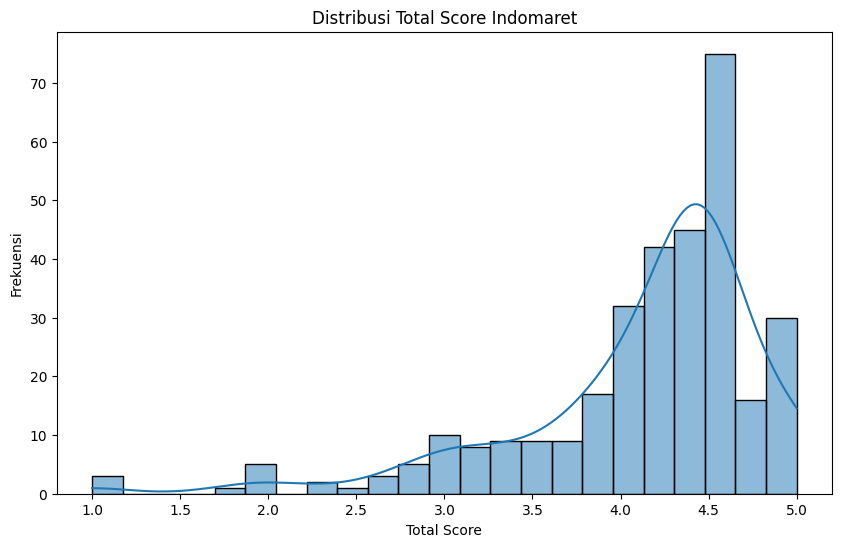

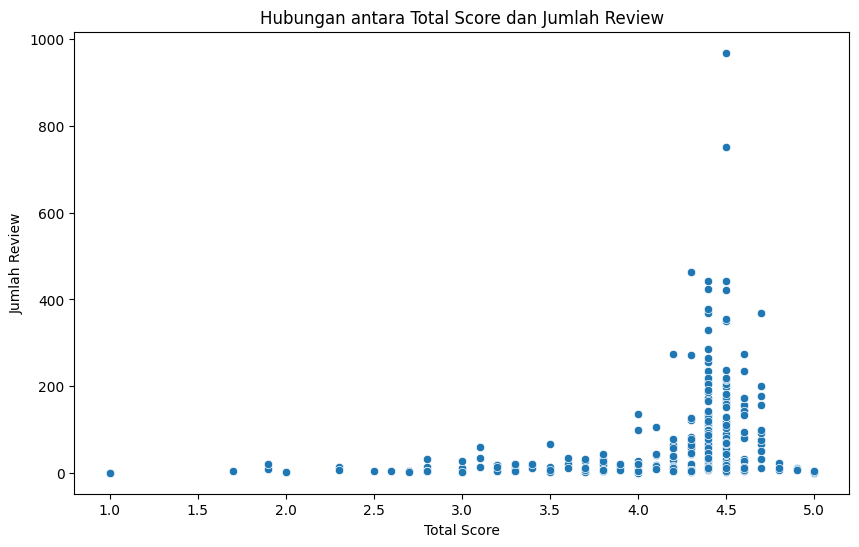

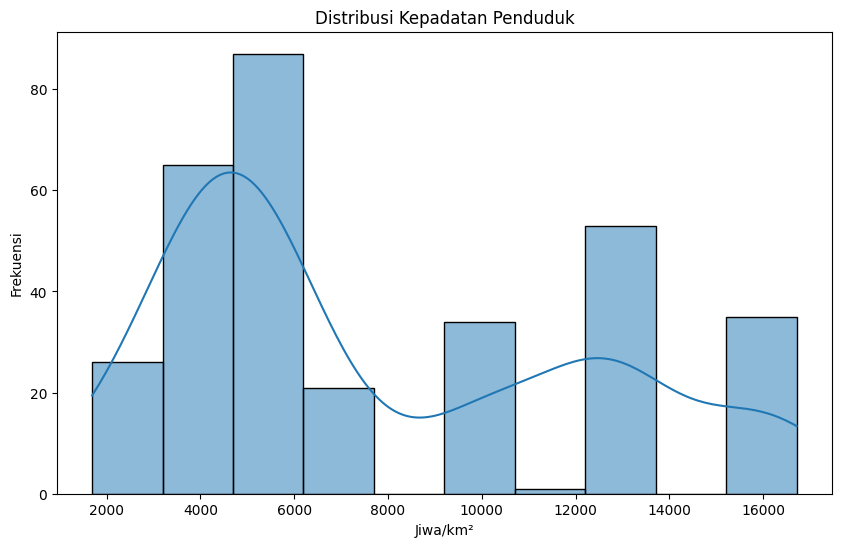

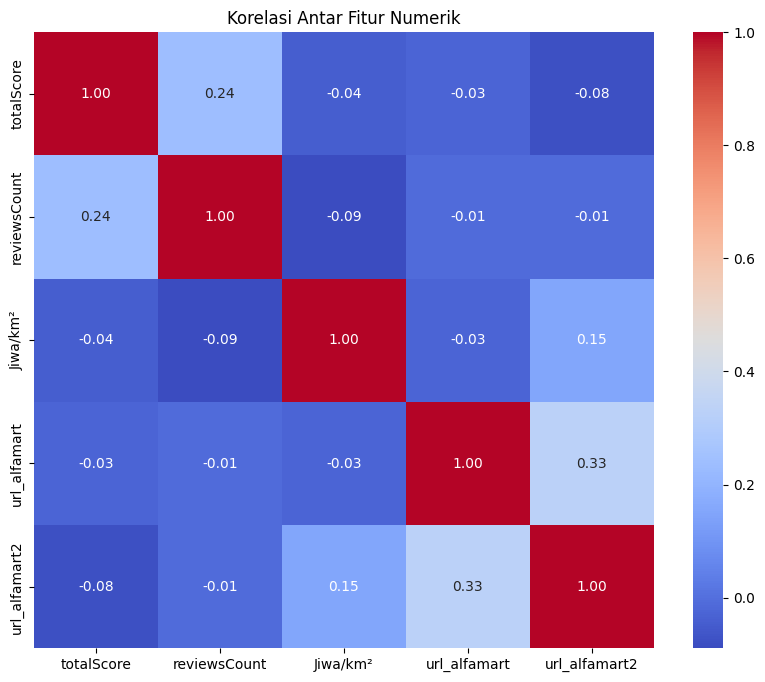

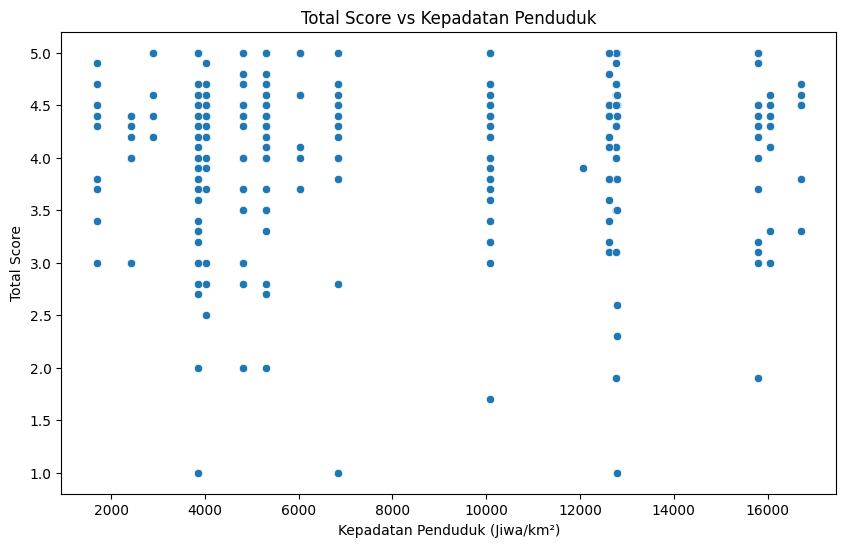

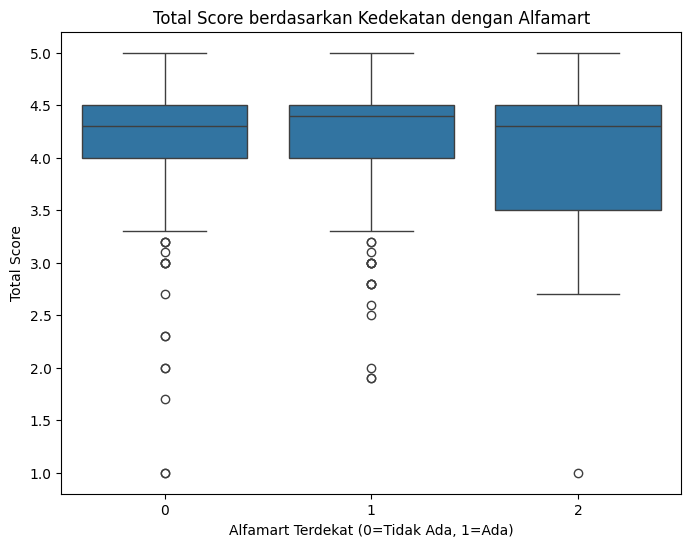

In [19]:
# prompt: buatlah visualisasi untuk df_indomaret

# Visualisasi distribusi totalScore
plt.figure(figsize=(10, 6))
sns.histplot(df_indomaret['totalScore'], kde=True)
plt.title('Distribusi Total Score Indomaret')
plt.xlabel('Total Score')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi hubungan antara totalScore dan reviewsCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalScore', y='reviewsCount', data=df_indomaret)
plt.title('Hubungan antara Total Score dan Jumlah Review')
plt.xlabel('Total Score')
plt.ylabel('Jumlah Review')
plt.show()

# Visualisasi distribusi 'Jiwa/km²'
plt.figure(figsize=(10, 6))
sns.histplot(df_indomaret['Jiwa/km²'], kde=True)
plt.title('Distribusi Kepadatan Penduduk')
plt.xlabel('Jiwa/km²')
plt.ylabel('Frekuensi')
plt.show()


# Visualisasi Korelasi antar fitur numerik
numerical_features = df_indomaret[['totalScore', 'reviewsCount', 'Jiwa/km²','url_alfamart', 'url_alfamart2']]  # Replace with your actual numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

# Scatter plot of totalScore vs Jiwa/km²
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jiwa/km²', y='totalScore', data=df_indomaret)
plt.title('Total Score vs Kepadatan Penduduk')
plt.xlabel('Kepadatan Penduduk (Jiwa/km²)')
plt.ylabel('Total Score')
plt.show()

# Box plot of totalScore grouped by the presence of nearby Alfamart
plt.figure(figsize=(8, 6))
sns.boxplot(x='kompetitor', y='totalScore', data=df_indomaret)
plt.title('Total Score berdasarkan Kedekatan dengan Alfamart')
plt.xlabel('Alfamart Terdekat (0=Tidak Ada, 1=Ada)')
plt.ylabel('Total Score')
plt.show()



In [20]:
df_indomaret.describe()

,totalScore,reviewsCount,location/lng,location/lat,Jiwa/km²,url_alfamart,url_alfamart2,kompetitor
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,4.129814,68.928571,104.750978,-2.963521,7763.748447,0.475155,0.090062,0.565217
std,0.705726,110.745890,0.033618,0.034160,4413.006312,0.500160,0.286716,0.653604
min,1.000000,1.000000,104.681345,-3.068441,1689.000000,0.000000,0.000000,0.000000
25%,3.900000,6.000000,104.726008,-2.989431,4034.000000,0.000000,0.000000,0.000000
50%,4.400000,20.000000,104.749688,-2.966218,5295.000000,0.000000,0.000000,0.000000
75%,4.500000,91.750000,104.775362,-2.937618,12621.000000,1.000000,0.000000,1.000000
max,5.000000,968.000000,104.846538,-2.878969,16715.000000,1.000000,1.000000,2.000000


In [21]:
# tahap akhir data wrangling, memilih kolom untuk clusterning ,'url_alfamart2'
df = df_indomaret[['totalScore','reviewsCount','Jiwa/km²','url_alfamart','url_alfamart2']]

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Explicitly specify the numerical columns to normalize
numerical_cols = ['totalScore', 'reviewsCount', 'Jiwa/km²','url_alfamart','url_alfamart2']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the specified numerical columns
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_normalized.head()

,totalScore,reviewsCount,Jiwa/km²,url_alfamart,url_alfamart2
0,0.675,0.028956,0.557833,1.0,0.0
1,0.825,0.015512,0.557833,0.0,0.0
2,0.700,0.028956,0.557833,0.0,0.0
3,0.850,0.110651,0.557833,0.0,0.0
4,0.825,0.020683,0.156063,1.0,0.0


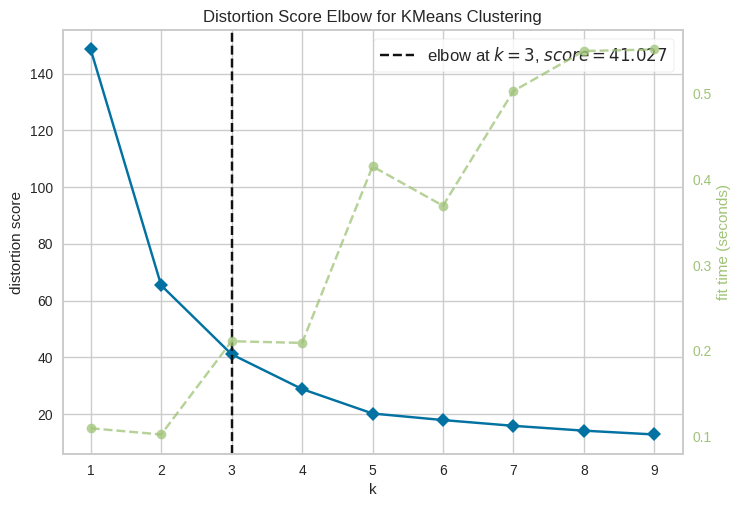

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=1, n_init=100, init='k-means++')

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_normalized)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

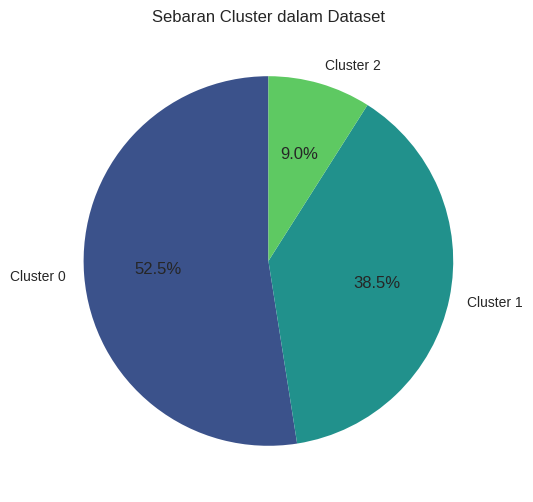

In [24]:
import seaborn as sns

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3 ,random_state=1, n_init=100)
kmeans.fit(df_normalized)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

clustered_df = df.copy()  # Membuat salinan df untuk menghindari modifikasi langsung
clustered_df['Cluster'] = labels  # Menambahkan label cluster sebagai kolom baru


# Hitung jumlah data per cluster
cluster_counts = clustered_df['Cluster'].value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts.values,
        labels=[f'Cluster {cluster}' for cluster in cluster_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("viridis", n_colors=len(cluster_counts)))
        #colors=plt.cm.viridis(cluster_counts.index / cluster_counts.index.max()))

# Atur judul
plt.title('Sebaran Cluster dalam Dataset')

# Tampilkan plot
plt.show()

In [25]:
print("Jumlah Data per Cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data")

Jumlah Data per Cluster:
Cluster 0: 169 data
Cluster 1: 124 data
Cluster 2: 29 data


In [26]:
# prompt: hasilkan nilai silhouette score dari hasil clustering

from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_normalized, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6057294621714923


In [27]:
# prompt: buatlah visualisasi hasil clustering 3 dimensi interaktif berdasarkan fitur totalScore	reviewsCount	Jiwa/km² dan warna nya ditentukan oleh cluster

import plotly.express as px

# Assuming 'clustered_df' is your DataFrame with 'Cluster' column
fig = px.scatter_3d(clustered_df, x='totalScore', y='reviewsCount', z='Jiwa/km²',
                    color='Cluster',
                    title='Interactive 3D Cluster Visualization',
                    labels={'totalScore':'Total Score', 'reviewsCount':'Review Count', 'Jiwa/km²':'Population Density'},
                    opacity=0.7)


fig.show()


In [28]:
# prompt: buatlah visualisasi yang sesuai untuk hasil clustering dengan pertimbangan fitur url_alfamart dan url_alfamart2

import plotly.express as px

# Assuming 'clustered_df' is your DataFrame with 'Cluster' column and 'url_alfamart', 'url_alfamart2'
fig = px.scatter_3d(clustered_df, x='reviewsCount', y='url_alfamart2', z='url_alfamart',
                    color='Cluster',
                    title='Interactive 3D Cluster Visualization (url_alfamart, url_alfamart2, totalScore)',
                    labels={'url_alfamart':'Nearby Alfamart', 'url_alfamart2':'Second Nearest Alfamart', 'totalScore':'Total Score'},
                    opacity=0.7)

fig.show()


In [29]:
# prompt: bautlah visualsisasi heatmap viridis dari hasil dari clustering

import plotly.express as px

# Assuming 'clustered_df' is your DataFrame with 'Cluster' column and numerical features
# Replace 'feature1', 'feature2', 'feature3' with the actual column names from your data

fig = px.imshow(clustered_df.corr(),
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=clustered_df.corr().columns,
                y=clustered_df.corr().index,
                color_continuous_scale='viridis')

fig.update_layout(title='Correlation Heatmap of Features across Clusters')
fig.show()


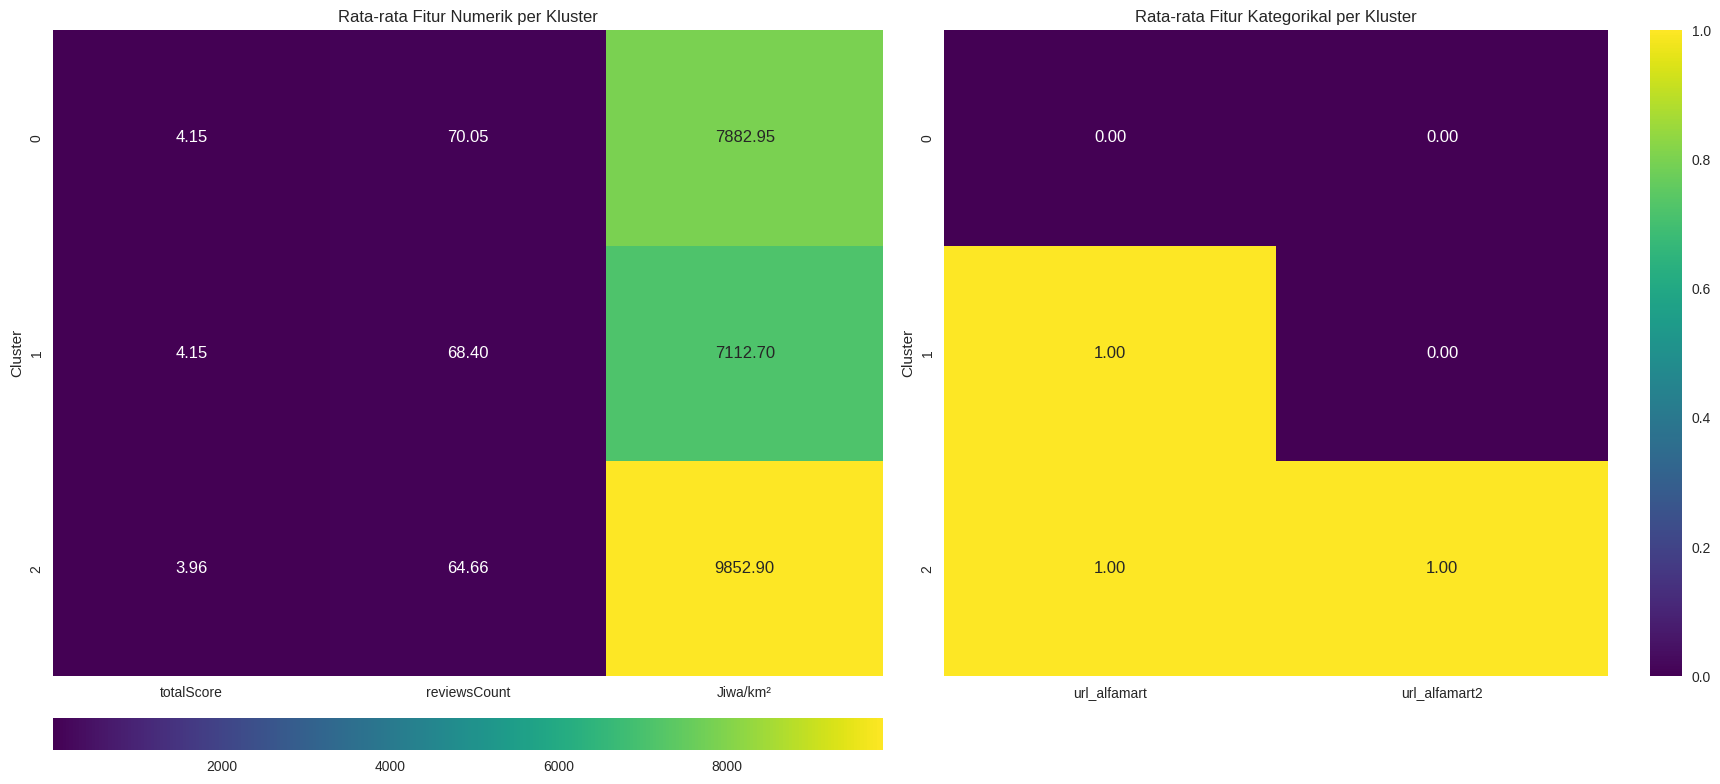

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd

# Assuming 'clustered_df' is your DataFrame with cluster labels

# Separate numerical and categorical features
numerical_features = ['totalScore', 'reviewsCount', 'Jiwa/km²']
categorical_features = ['url_alfamart', 'url_alfamart2']

# Calculate means for numerical features
numerical_means = clustered_df.groupby('Cluster')[numerical_features].mean()

# Calculate means for categorical features (treating them as numerical for visualization)
categorical_means = clustered_df.groupby('Cluster')[categorical_features].mean()

# Create figure and gridspec
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 1])

# Create axes for heatmaps and colorbar
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
cax = plt.subplot(gs[1, 0])

# Heatmap for numerical features with colorbar
sns.heatmap(numerical_means, annot=True, cmap='viridis', fmt=".2f", ax=ax0, cbar_ax=cax,
            cbar_kws={'orientation': 'horizontal'})
ax0.set_title('Rata-rata Fitur Numerik per Kluster')

# Heatmap for categorical features
sns.heatmap(categorical_means, annot=True, cmap='viridis', fmt=".2f", ax=ax1)
ax1.set_title('Rata-rata Fitur Kategorikal per Kluster')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Separate numerical and categorical features
numerical_features = ['totalScore', 'reviewsCount', 'Jiwa/km²']
categorical_features = ['url_alfamart', 'url_alfamart2']

# Calculate means for numerical features
numerical_means = clustered_df.groupby('Cluster')[numerical_features].mean()

# Calculate means for categorical features (treating them as numerical for visualization)
categorical_means = clustered_df.groupby('Cluster')[categorical_features].mean()

# Display the tables
print("Rata-rata Fitur Numerik per Kluster:")
display(numerical_means)  # Use display for better formatting in Jupyter notebooks

print("\nRata-rata Fitur Kategorikal per Kluster:")
display(categorical_means) # Use display for better formatting in Jupyter notebooks

Rata-rata Fitur Numerik per Kluster:


,totalScore,reviewsCount,Jiwa/km²
Cluster,,,
0,4.147337,70.053254,7882.946746
1,4.145968,68.395161,7112.701613
2,3.958621,64.655172,9852.896552



Rata-rata Fitur Kategorikal per Kluster:


,url_alfamart,url_alfamart2
Cluster,,
0,0.0,0.0
1,1.0,0.0
2,1.0,1.0


In [32]:
# prompt: buatlah visualisasi yang lebih menggambarkan sebaran data hasil clustering

import plotly.express as px

# Assuming 'clustered_df' is your DataFrame with 'Cluster' column and numerical features
# Replace 'feature1', 'feature2', 'feature3' with the actual column names from your data

# Create a 3D scatter plot
fig = px.scatter_3d(clustered_df, x='totalScore', y='reviewsCount', z='Jiwa/km²',
                    color='Cluster',
                    title='Interactive 3D Cluster Visualization',
                    labels={'totalScore':'Total Score', 'reviewsCount':'Review Count', 'Jiwa/km²':'Population Density'},
                    opacity=0.7,
                    width=800,  # Adjust width as needed
                    height=600) # Adjust height as needed

fig.show()


# Create a parallel coordinates plot
fig = px.parallel_coordinates(clustered_df, color='Cluster',
                              title='Parallel Coordinates Plot of Clusters',
                              labels={'totalScore':'Total Score', 'reviewsCount':'Review Count', 'Jiwa/km²':'Population Density'},
                              width=800,  # Adjust width as needed
                              height=600) # Adjust height as needed

fig.show()


# Create a parallel categories plot
fig = px.parallel_categories(clustered_df, color='Cluster',
                             title='Parallel Categories Plot of Clusters',
                             labels={'totalScore':'Total Score', 'reviewsCount':'Review Count', 'Jiwa/km²':'Population Density'},
                             width=800,  # Adjust width as needed
                             height=600)  # Adjust height as needed

fig.show()


In [33]:
# Assuming 'df_indomaret' is your original DataFrame with location data
# and 'clustered_df' is your DataFrame after clustering with the 'Cluster' column

# Merge 'location/lng' and 'location/lat' into clustered_df
clustered_df = pd.merge(clustered_df, df_indomaret[['totalScore', 'reviewsCount','location/lng', 'location/lat']],
                        on=['totalScore', 'reviewsCount'], how='left')

# Now you can create the scatter plot:
import plotly.express as px

fig = px.scatter(clustered_df, x='location/lng', y='location/lat', color='Cluster',
                 title='Scatter Plot of Indomaret Locations by Cluster',
                 labels={'location/lng': 'Longitude', 'location/lat': 'Latitude', 'Cluster': 'Cluster'})

fig.show()

Cluster 0:

Performa Tinggi, Kepadatan Sedang, Persaingan Tinggi: Indomaret di cluster ini memiliki total score dan jumlah review tinggi, kepadatan penduduk sedang, dan dikelilingi oleh banyak toko Alfamart dalam radius 1 kilometer.
Interpretasi: Cluster ini menunjukkan Indomaret yang berada di area yang cukup ramai, diminati pelanggan, tetapi menghadapi persaingan yang ketat dari Alfamart.
Cluster 1:

Performa Cukup Tinggi, Kepadatan Tinggi, Persaingan Tinggi: Indomaret di cluster ini memiliki total score dan jumlah review cukup tinggi, kepadatan penduduk tinggi, dan juga dikelilingi oleh banyak toko Alfamart dalam radius 1 kilometer.
Interpretasi: Cluster ini menunjukkan Indomaret yang berada di area yang sangat padat penduduk, memiliki performa yang cukup baik, dan menghadapi persaingan yang sangat ketat dari Alfamart.
Cluster 2:

Performa Rendah, Kepadatan Sedang, Persaingan Rendah: Indomaret di cluster ini memiliki total score dan jumlah review rendah, kepadatan penduduk sedang, dan relatif sedikit dikelilingi oleh toko Alfamart dalam radius 1 kilometer.
Interpretasi: Cluster ini menunjukkan Indomaret yang berada di area yang kurang ramai, memiliki performa yang kurang baik, dan menghadapi persaingan yang lebih longgar dari Alfamart.
Poin Penting dengan Informasi Tambahan:

Persaingan: Jumlah toko Alfamart di sekitar Indomaret menjadi indikator penting tingkat persaingan. Cluster 0 dan 1 menunjukkan area dengan persaingan tinggi, sementara Cluster 2 menunjukkan persaingan yang lebih rendah.
Strategi Bisnis: Informasi ini dapat digunakan untuk menentukan strategi bisnis yang berbeda untuk setiap cluster. Misalnya:
Cluster 0 dan 1: Fokus pada strategi untuk mempertahankan pelanggan dan memenangkan persaingan, seperti promosi, peningkatan layanan, atau diferensiasi produk.
Cluster 2: Fokus pada strategi untuk meningkatkan performa dan menarik lebih banyak pelanggan, seperti peningkatan kualitas produk, penataan toko, atau promosi yang menarik.
Kepadatan Penduduk vs. Performa: Meskipun kepadatan penduduk tinggi (Cluster 1) tidak selalu menjamin performa yang tinggi, kepadatan penduduk yang sedang (Cluster 0) dengan persaingan tinggi tetap dapat menghasilkan performa yang baik.
Semoga informasi tambahan ini memberikan pemahaman yang lebih komprehensif tentang hasil clustering Anda!

##Interpretasi untuk Calon Pelanggan

####**Cluster 0:** "Pilihan Utama untuk Kualitas dan Kenyamanan"

Keunggulan: Indomaret di cluster ini tetap menjadi pilihan utama karena kualitas produk dan layanan yang baik, dibuktikan dengan rating dan ulasan yang tinggi. Aksesibilitas mudah dengan kepadatan penduduk sedang. Harga tetap sama di semua toko, sehingga tidak perlu khawatir tentang perbedaan harga.
Kekurangan: Persaingan dengan Alfamart tetap ketat, yang berarti calon pelanggan tetap memiliki banyak pilihan alternatif.
Rekomendasi untuk Calon Pelanggan: Cluster ini cocok bagi calon pelanggan yang memprioritaskan kualitas dan kenyamanan, tanpa perlu khawatir tentang perbedaan harga. Calon pelanggan yang menghargai ulasan positif dan lokasi yang mudah dijangkau akan merasa puas dengan Indomaret di cluster ini.

####**Cluster 1:** "Strategis dan Kompetitif"

Keunggulan: Indomaret di cluster ini tetap strategis karena lokasinya di area padat penduduk. Harga tetap sama dengan toko lain, memberikan kepastian harga bagi calon pelanggan.
Kekurangan: Persaingan dengan Alfamart tetap ketat, dan area ini cenderung ramai.
Rekomendasi untuk Calon Pelanggan: Cluster ini cocok bagi calon pelanggan yang mengutamakan kemudahan akses dan kepastian harga. Calon pelanggan yang tinggal atau bekerja di area padat penduduk dan sering berbelanja kebutuhan sehari-hari mungkin akan merasa nyaman dengan Indomaret di cluster ini.

####**Cluster 2:** "Potensi untuk Peningkatan"

Keunggulan: Harga tetap sama dengan toko lain, sehingga calon pelanggan tidak perlu khawatir tentang harga yang lebih tinggi. Persaingan dengan Alfamart lebih rendah, yang dapat memberikan pengalaman berbelanja yang lebih tenang.
Kekurangan: Rating dan ulasan cenderung lebih rendah, menunjukkan potensi masalah pada kualitas produk, layanan, atau suasana toko.
Rekomendasi untuk Calon Pelanggan: Cluster ini cocok bagi calon pelanggan yang ingin menghindari keramaian dan persaingan yang ketat. Namun, calon pelanggan perlu menyadari bahwa Indomaret di cluster ini mungkin perlu meningkatkan kualitas produk, layanan, atau suasana toko agar lebih menarik.